# **Part 1: Building and Training Basic Neural Networks**

## TensorFlow/**Keras**

### Import Libraries and Load the Dataset

We'll use the MNIST dataset, which can be loaded directly from TensorFlow/Keras

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [45]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Preprocess the Data

Normalization: Scale pixel values to the range [0, 1].

Reshape the input data and one-hot encode the labels.

In [46]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the input data to match the input layer's requirement
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### Model Architecture

Create a simple neural network with Keras

In [47]:
# Build the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))  # Hidden layer with 128 neurons and ReLU activation
model.add(Dense(64, activation='relu'))  # Another hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer for multi-class classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the Model

Choose the loss function, optimizer, and metrics

In [48]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Train the Model
Use the fit() method to train the model

In [6]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=10,             # Number of times the model iterates over the data
    batch_size=32          # Number of samples per gradient update
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8628 - loss: 0.4718 - val_accuracy: 0.9574 - val_loss: 0.1386
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9624 - loss: 0.1264 - val_accuracy: 0.9656 - val_loss: 0.1150
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9742 - loss: 0.0807 - val_accuracy: 0.9672 - val_loss: 0.1135
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9822 - loss: 0.0596 - val_accuracy: 0.9722 - val_loss: 0.0994
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9860 - loss: 0.0426 - val_accuracy: 0.9727 - val_loss: 0.1017
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9718 - val_loss: 0.1009
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 0.9712 - val_loss: 0.1078
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9924 - loss: 0.02

### Monitor Training
The history object stores training and validation metrics, which can be visualized using Matplotlib.


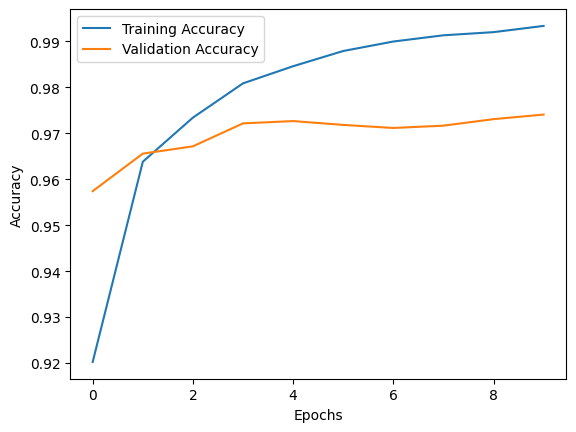

In [7]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluate the Model
Use the evaluate() method and generate a confusion matrix

In [8]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Predict class labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.1297
Test Accuracy: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 965    0    1    2    2    2    3    2    1    2]
 [   0 1127    2    2    0    1    2    1    0    0]
 [   3    0 1013    1    2    0    1    9    3    0]
 [   0    1    7  980    0    4    0    8    1    9]
 [   1    0    3    0  958    0    4    3    0   13]
 [   2    0    0   12    2  861   10    1    1    3]
 [   6    3    1    1    8    3  934    1    1    0]
 [   0    4    8    0    1    0    0 1005    2    8]
 [   2    0    9    6    4    6    3    7  925   12]
 [   3    2    0    3   12    1    0   11    0  977]]


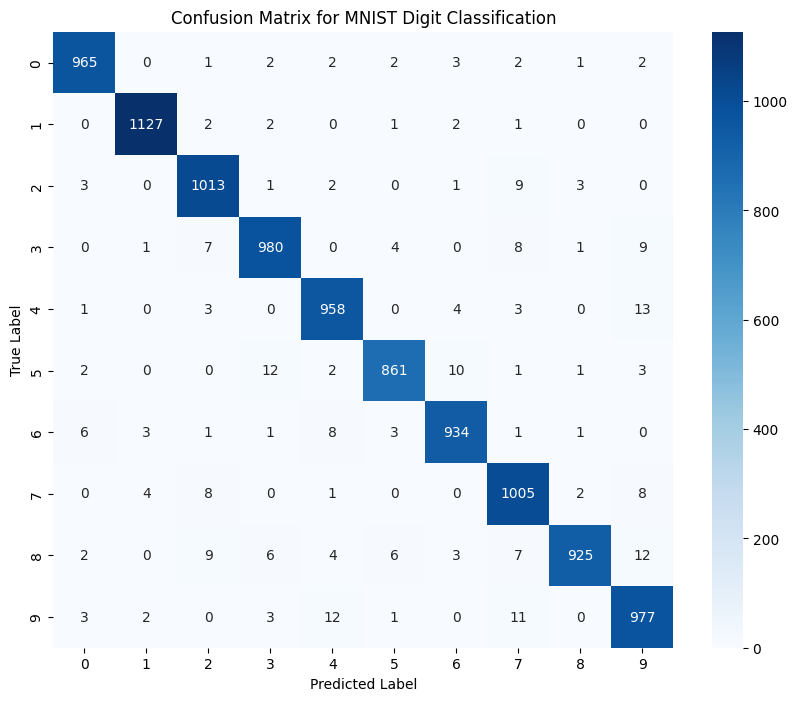

In [9]:
# Set up the matplotlib figure and size
plt.figure(figsize=(10, 8))

# Create a heatmap from the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Digit Classification')
plt.show()

In [12]:
history1 = model.fit(
    x_train, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=15,             # Number of times the model iterates over the data
    batch_size=32          # Number of samples per gradient update
)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8662 - loss: 0.4595 - val_accuracy: 0.9567 - val_loss: 0.1418
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9638 - loss: 0.1207 - val_accuracy: 0.9657 - val_loss: 0.1108
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9757 - loss: 0.0773 - val_accuracy: 0.9655 - val_loss: 0.1161
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9828 - loss: 0.0529 - val_accuracy: 0.9737 - val_loss: 0.0889
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9869 - loss: 0.0413 - val_accuracy: 0.9755 - val_loss: 0.0872
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9897 - loss: 0.0307 - val_accuracy: 0.9728 - val_loss: 0.1021
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9737 - val_loss: 0.1001
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9935 - loss: 0.0210 

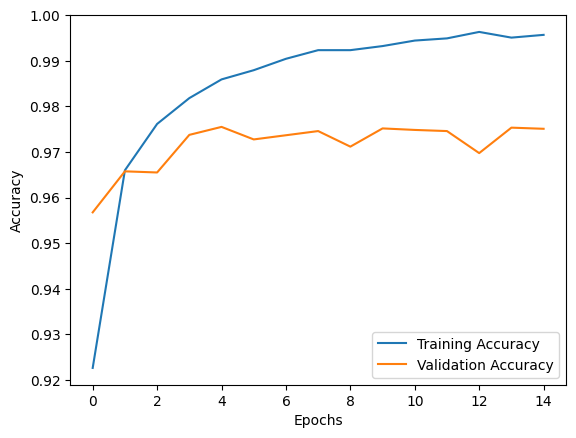

In [13]:
# Plot training and validation accuracy
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Predict class labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1436
Test Accuracy: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 968    1    2    1    0    2    3    1    2    0]
 [   0 1116    3    0    0    0    1    0   15    0]
 [   2    4 1000    9    3    0    3    4    7    0]
 [   1    0    4  983    0    3    0    4    9    6]
 [   1    0    2    0  959    2    5    1    1   11]
 [   2    1    0   10    1  868    5    0    5    0]
 [   1    2    1    1    7    7  937    0    2    0]
 [   1    6   15    0    0    0    0  981   11   14]
 [   0    1    3    7    4    4    2    1  950    2]
 [   2    2    0    1    9    8    1    0    7  979]]


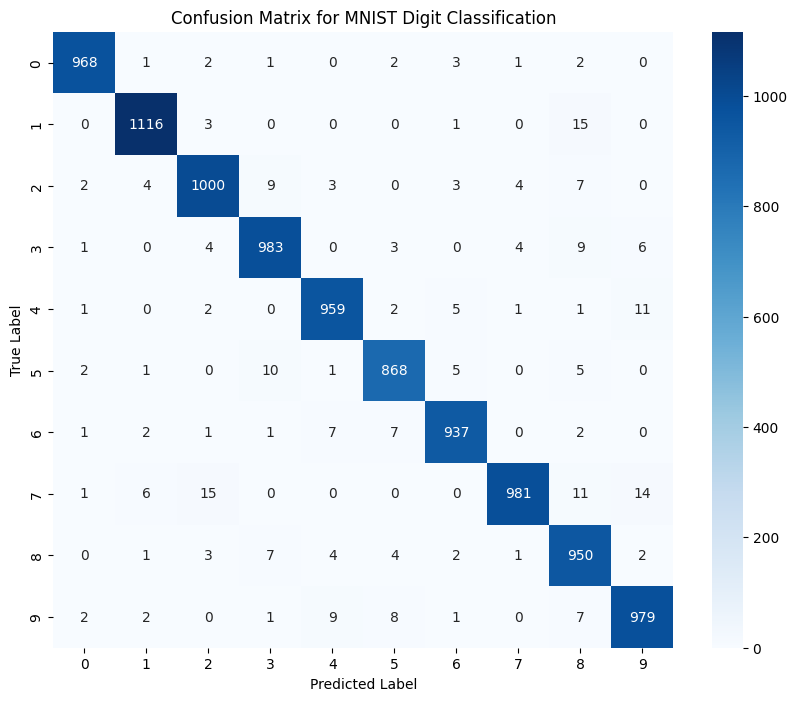

In [15]:
# Set up the matplotlib figure and size
plt.figure(figsize=(10, 8))

# Create a heatmap from the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Digit Classification')
plt.show()

In [18]:
history2 = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=64
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8406 - loss: 0.5423 - val_accuracy: 0.9512 - val_loss: 0.1682
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9604 - loss: 0.1335 - val_accuracy: 0.9669 - val_loss: 0.1109
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9741 - loss: 0.0871 - val_accuracy: 0.9688 - val_loss: 0.1028
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9803 - loss: 0.0651 - val_accuracy: 0.9707 - val_loss: 0.0980
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9705 - val_loss: 0.0997
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9881 - loss: 0.0377 - val_accuracy: 0.9684 - val_loss: 0.1102
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9911 - loss: 0.0292 - val_accuracy: 0.9730 - val_loss: 0.0954
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.

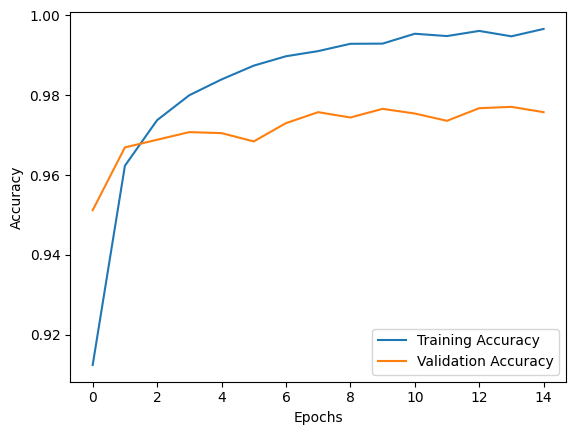

In [19]:
# Plot training and validation accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Predict class labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.1048
Test Accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 969    1    1    3    0    0    2    2    2    0]
 [   0 1127    4    0    0    1    1    1    1    0]
 [   8    0 1005    5    2    0    1    4    7    0]
 [   0    0    4  986    0   12    0    5    3    0]
 [   2    1    3    0  965    0    4    0    0    7]
 [   3    0    0    7    1  874    6    0    0    1]
 [   5    3    1    1    4    6  937    0    1    0]
 [   1    3    9    2    2    0    1 1004    2    4]
 [   2    1    2    6    1    5    3    4  949    1]
 [   5    4    0    4   17    3    0    9    3  964]]


## **PyTorch**

### Import Libraries

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Preprocess the Dataset
Load the MNIST dataset using torchvision

In [52]:
# Define the transformation: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean=0.5, std=0.5
])

# Download and load the MNIST dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders for batching
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

### Define the Neural Network Model
Create a neural network model using torch.nn.Module

In [53]:
# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)       # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)        # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the 28x28 images
        x = F.relu(self.fc1(x))  # ReLU activation for the first hidden layer
        x = F.relu(self.fc2(x))  # ReLU activation for the second hidden layer
        x = F.log_softmax(self.fc3(x), dim=1)  # Log-Softmax activation for output
        return x

# Initialize the model
model = NeuralNet()

### Set Up Training and Evaluation Loop
Specifying a loss function, an optimizer, and the loop to train the model over multiple epochs.

In [54]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

In [25]:
def train_model(model, train_loader, optimizer, criterion, num_epochs=5):

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode

        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:

            optimizer.zero_grad()  # Zero the parameter gradients

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    return model

### Evaluate the Model
Check accuracy on the test set and generate a confusion matrix

In [26]:
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode

    y_pred, y_true = [], []

    with torch.no_grad():  # Disable gradient calculation
        for images, labels in test_loader:

            # Forward pass
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Store predictions and true labels for accuracy and confusion matrix
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    return accuracy, conf_matrix

In [27]:
model1 = train_model(model,train_loader,optimizer,criterion,10)

Epoch [1/10], Loss: 0.4059, Accuracy: 87.83%
Epoch [2/10], Loss: 0.1938, Accuracy: 94.17%
Epoch [3/10], Loss: 0.1441, Accuracy: 95.61%
Epoch [4/10], Loss: 0.1144, Accuracy: 96.48%
Epoch [5/10], Loss: 0.0981, Accuracy: 97.03%
Epoch [6/10], Loss: 0.0867, Accuracy: 97.23%
Epoch [7/10], Loss: 0.0765, Accuracy: 97.61%
Epoch [8/10], Loss: 0.0691, Accuracy: 97.81%
Epoch [9/10], Loss: 0.0612, Accuracy: 97.98%
Epoch [10/10], Loss: 0.0545, Accuracy: 98.27%


In [28]:
accuracy, conf_matrix = evaluate_model(model1, test_loader)
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 0.96%


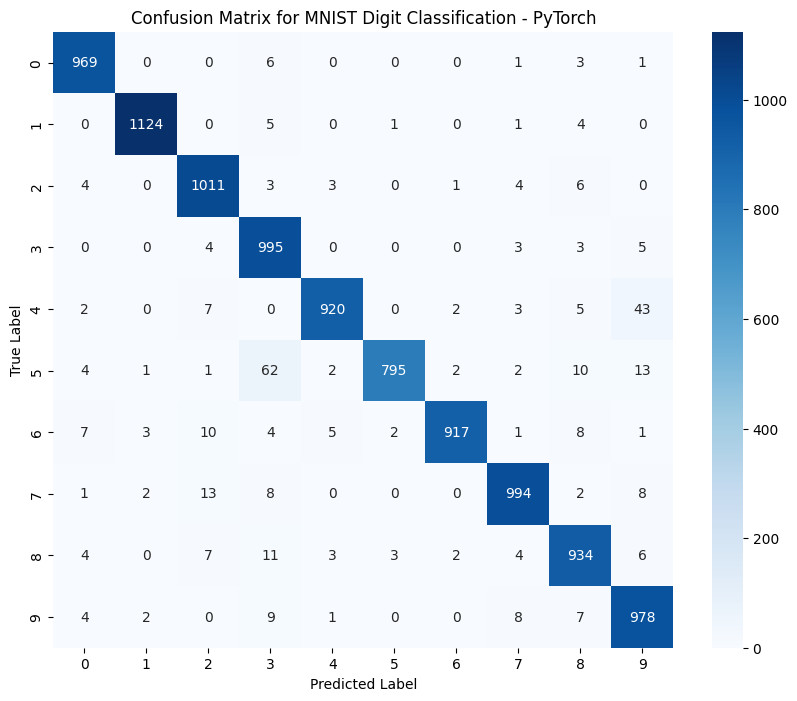

In [29]:
# Set up the matplotlib figure and size
plt.figure(figsize=(10, 8))

# Create a heatmap from the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Digit Classification - PyTorch')
plt.show()

After RE execute the cells of Define the Neural Network Model And Define the loss

In [32]:
model2 = train_model(model,train_loader,optimizer,criterion,15)

Epoch [1/15], Loss: 0.3728, Accuracy: 89.02%
Epoch [2/15], Loss: 0.1724, Accuracy: 94.80%
Epoch [3/15], Loss: 0.1284, Accuracy: 96.03%
Epoch [4/15], Loss: 0.1042, Accuracy: 96.77%
Epoch [5/15], Loss: 0.0903, Accuracy: 97.18%
Epoch [6/15], Loss: 0.0808, Accuracy: 97.45%
Epoch [7/15], Loss: 0.0706, Accuracy: 97.75%
Epoch [8/15], Loss: 0.0629, Accuracy: 97.98%
Epoch [9/15], Loss: 0.0570, Accuracy: 98.21%
Epoch [10/15], Loss: 0.0540, Accuracy: 98.24%
Epoch [11/15], Loss: 0.0492, Accuracy: 98.39%
Epoch [12/15], Loss: 0.0441, Accuracy: 98.53%
Epoch [13/15], Loss: 0.0381, Accuracy: 98.71%
Epoch [14/15], Loss: 0.0404, Accuracy: 98.61%
Epoch [15/15], Loss: 0.0341, Accuracy: 98.90%


In [33]:
accuracy, conf_matrix = evaluate_model(model2, test_loader)
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 0.98%


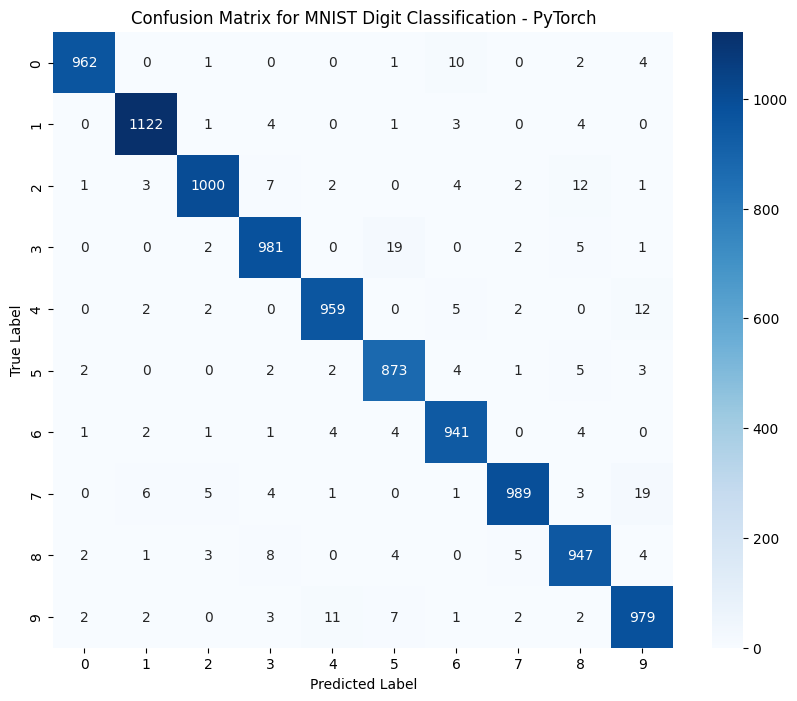

In [34]:
# Set up the matplotlib figure and size
plt.figure(figsize=(10, 8))

# Create a heatmap from the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Digit Classification - PyTorch')
plt.show()

## **Compression**

In [49]:
import time

# For TensorFlow/Keras training duration
start_time = time.time()
model.fit(x_train, y_train,epochs=10,batch_size=32)
keras_training_duration = time.time() - start_time
print(f"TensorFlow/Keras Training Duration: {keras_training_duration:.2f} seconds")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8694 - loss: 0.4352
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9686 - loss: 0.1045
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9785 - loss: 0.0681
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9867 - loss: 0.0398
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9894 - loss: 0.0310
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0244
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9919 - loss: 0.0244
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9936 - loss: 0.0195
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9948 - loss: 0.0169
TensorFlow/Keras Training Duration: 98.50 seconds


In [50]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"TensorFlow/Keras Test Accuracy: {test_accuracy:.2f}")

# Predict class labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9714 - loss: 0.1152
TensorFlow/Keras Test Accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 969    1    0    1    0    0    7    1    1    0]
 [   0 1123    2    4    0    0    2    1    3    0]
 [   3    1  995    4   10    0   10    4    4    1]
 [   1    0    3  991    0    5    0    6    4    0]
 [   0    2    1    1  956    0    9    0    1   12]
 [   2    0    0    9    0  870    6    3    2    0]
 [   2    2    0    1    2    2  948    0    1    0]
 [   1    6    4    2    1    0    0 1009    3    2]
 [   6    1    3    9    1    4   10    2  936    2]
 [   3    3    0   11    6    4    2   10    7  963]]


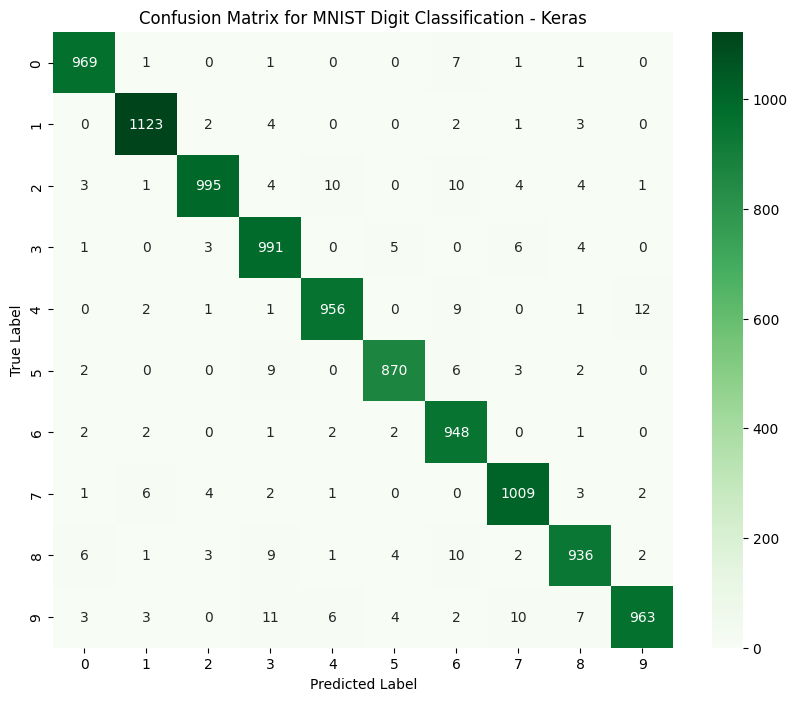

In [51]:
# Set up the matplotlib figure and size
plt.figure(figsize=(10, 8))

# Create a heatmap from the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Digit Classification - Keras')
plt.show()

In [55]:
# For PyTorch training duration
start_time = time.time()
train_model(model,train_loader,optimizer,criterion,10)
pytorch_training_duration = time.time() - start_time
print(f"PyTorch Training Duration: {pytorch_training_duration:.2f} seconds")

Epoch [1/10], Loss: 0.3902, Accuracy: 88.38%
Epoch [2/10], Loss: 0.1812, Accuracy: 94.46%
Epoch [3/10], Loss: 0.1344, Accuracy: 95.94%
Epoch [4/10], Loss: 0.1104, Accuracy: 96.54%
Epoch [5/10], Loss: 0.0943, Accuracy: 97.06%
Epoch [6/10], Loss: 0.0812, Accuracy: 97.51%
Epoch [7/10], Loss: 0.0717, Accuracy: 97.74%
Epoch [8/10], Loss: 0.0653, Accuracy: 97.91%
Epoch [9/10], Loss: 0.0611, Accuracy: 98.01%
Epoch [10/10], Loss: 0.0540, Accuracy: 98.26%
PyTorch Training Duration: 231.34 seconds


In [56]:
accuracy, conf_matrix = evaluate_model(model1, test_loader)
print(f"Test Accuracy: {accuracy:.2f}%")
print(conf_matrix)

Test Accuracy: 0.96%
[[ 969    0    0    6    0    0    0    1    3    1]
 [   0 1124    0    5    0    1    0    1    4    0]
 [   4    0 1011    3    3    0    1    4    6    0]
 [   0    0    4  995    0    0    0    3    3    5]
 [   2    0    7    0  920    0    2    3    5   43]
 [   4    1    1   62    2  795    2    2   10   13]
 [   7    3   10    4    5    2  917    1    8    1]
 [   1    2   13    8    0    0    0  994    2    8]
 [   4    0    7   11    3    3    2    4  934    6]
 [   4    2    0    9    1    0    0    8    7  978]]


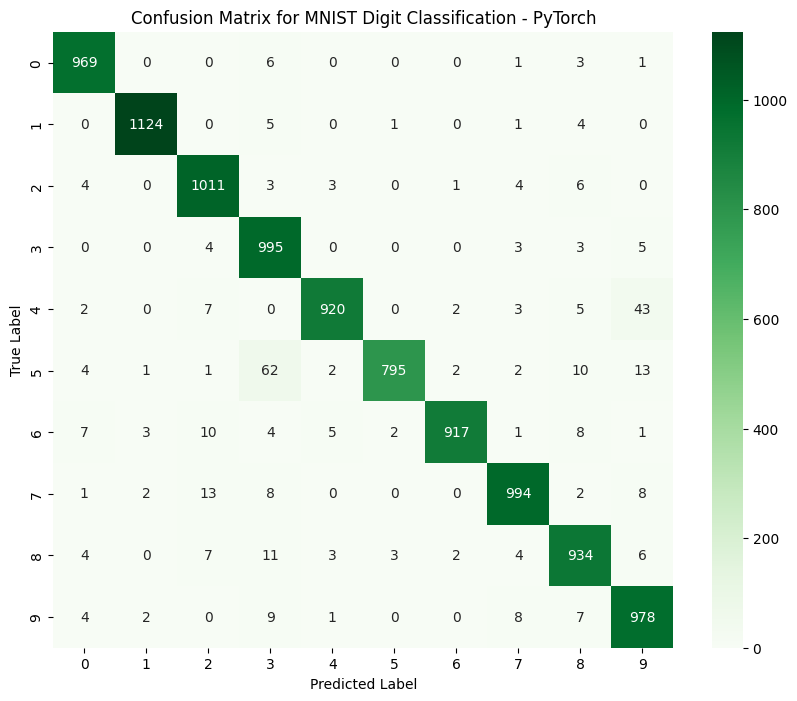

In [57]:
# Set up the matplotlib figure and size
plt.figure(figsize=(10, 8))

# Create a heatmap from the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Digit Classification - PyTorch')
plt.show()

**From the comparison, it’s clear that Keras performs more efficiently for this classification problem, achieving both a higher accuracy (98%) and a faster training duration (98.50 seconds) compared to PyTorch (96% accuracy, 231.34 seconds). This suggests that for this particular task and with these specific parameters, Keras is more optimized and user-friendly, which may benefit projects with similar goals.**

# **Part 2: Implementing Convolutional Neural Networks (CNNs)**

## TensorFlow/**Keras**

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3) (50000, 10)


### Build the CNN Model

In [3]:
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (10 classes for CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Conv2D: We use three convolutional layers. The first has 32 filters, the second has 64 filters, and the third also uses 64 filters.
- MaxPooling2D: Max-pooling layers are used after each convolutional layer to reduce the spatial dimensions (height and width).
- Flatten: Converts the 2D matrix output from the convolutional layers into a 1D vector for the fully connected layers.
- Dense: Fully connected layers, ending with a softmax activation function for multi-class classification.

### Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [5]:
model1 = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 77ms/step - accuracy: 0.3215 - loss: 1.8259 - val_accuracy: 0.5119 - val_loss: 1.3431
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.5440 - loss: 1.2757 - val_accuracy: 0.5933 - val_loss: 1.1589
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 70ms/step - accuracy: 0.6130 - loss: 1.0973 - val_accuracy: 0.6415 - val_loss: 1.0288
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 60ms/step - accuracy: 0.6511 - loss: 0.9972 - val_accuracy: 0.6384 - val_loss: 1.0304
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.6747 - loss: 0.9272 - val_accuracy: 0.6665 - val_loss: 0.9547
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.6969 - loss: 0.8584 - val_accuracy: 0.6802 - val_loss: 0.9237
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 67ms/step - accuracy: 0.7177 - loss: 0.8133 - val_accuracy: 0.6773 - val_loss: 0.9486
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.7331 - loss: 0.7644 - 

### Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7140 - loss: 0.8327
Test accuracy: 0.7116


### Make Predictions

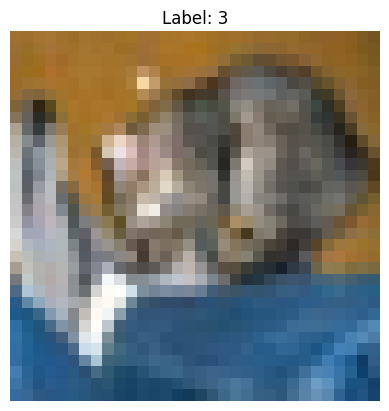

In [7]:
import matplotlib.pyplot as plt

# Display the first image in the testing dataset
plt.imshow(X_test[0])  # X_test[0] is the first image
plt.title(f"Label: {np.argmax(y_test[0])}")  # np.argmax() gives the class index of one-hot encoded label
plt.axis('off')  # Turn off axis labels
plt.show()

In [8]:
# Predict on the test data
predictions = model.predict(X_test)

# Get the class with the highest probability for the first test image
predicted_class = np.argmax(predictions[0])
print(f'Predicted class for the first test image: {predicted_class}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Predicted class for the first test image: 3


### Get predictions for 9 test images displayed in the grid

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


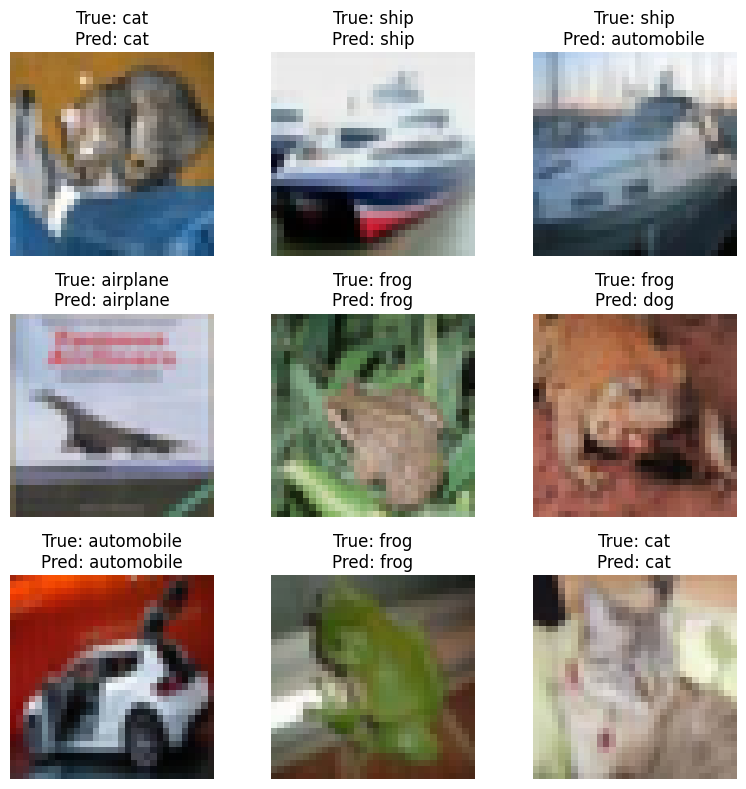

In [9]:
# The CIFAR-10 dataset has 10 classes, and they are as follows:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(X_test[:9])  # Predict for the first 9 images
predicted_labels = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels

# Display the images and their corresponding predicted and true labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Loop through the 9 images and plot them
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])  # Show the i-th image
    true_label = np.argmax(y_test[i])  # Get the true label index
    predicted_label = predicted_labels[i]  # Get the predicted label index

    # Set the title as true label and predicted label
    ax.set_title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")
    ax.axis('off')  # Hide the axes for clarity

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

### **Enhancing the performance by increasingthe accuracy**

Data Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,         # Rotate the image by 15 degrees
    width_shift_range=0.1,     # Shift image width by 10%
    height_shift_range=0.1,    # Shift image height by 10%
    horizontal_flip=True,      # Flip the image horizontally
    zoom_range=0.1             # Randomly zoom in by 10%
)

# Fit the generator to the training data
datagen.fit(X_train)

Add Dropout Layers

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout after first pooling layer

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout after second pooling layer

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout after dense layer
    Dense(10, activation='softmax')
])


Use Batch Normalization

In [15]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),  # Batch Normalization after Conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Batch Normalization after Conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),  # Batch Normalization after Dense layer
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Optimize Learning Rate with Scheduling

In [16]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0005
    else:
        return 0.0001

lr_scheduler = LearningRateScheduler(lr_schedule)

Train the Model with Improvements

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 139ms/step - accuracy: 0.3228 - loss: 2.1194 - val_accuracy: 0.4715 - val_loss: 1.5578 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 127ms/step - accuracy: 0.4784 - loss: 1.4468 - val_accuracy: 0.4207 - val_loss: 1.6471 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 119ms/step - accuracy: 0.5314 - loss: 1.3193 - val_accuracy: 0.6031 - val_loss: 1.1093 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.5605 - loss: 1.2336 - val_accuracy: 0.5108 - val_loss: 1.4158 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.5784 - loss: 1.1956 - val_accuracy: 0.6060 - val_loss: 1.0958 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.5952 - loss: 1.1495 - val_accuracy: 0.6192 - val_loss: 1.0700 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 118ms/step - accuracy: 0.6025 - l

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7226 - loss: 0.7868
Test accuracy: 0.7242000102996826


## **PyTorch**

### Setup and Load CIFAR-10 Data

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define data augmentation transformations for training data
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))  # CIFAR-10 mean and std
])

# Simple transformation for test data (no augmentation)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

# Load CIFAR-10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:06<00:00, 27.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Define the CNN Model with Dropout and Batch Normalization

In [22]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))

        x = x.view(-1, 128 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate model and define loss function and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Implement Learning Rate Scheduling

In [23]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

### Train the Model

In [ ]:
# Training loop
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Update learning rate
    scheduler.step()

    # Print statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}")

print("Finished Training")

Epoch [1/30], Loss: 1.5623
Epoch [2/30], Loss: 1.2435
Epoch [3/30], Loss: 1.1333
Epoch [4/30], Loss: 1.0627
Epoch [5/30], Loss: 1.0030
Epoch [6/30], Loss: 0.9570
Epoch [7/30], Loss: 0.9198
Epoch [8/30], Loss: 0.8916
Epoch [9/30], Loss: 0.8574
Epoch [10/30], Loss: 0.8361
Epoch [11/30], Loss: 0.7731
Epoch [12/30], Loss: 0.7558
Epoch [13/30], Loss: 0.7441
Epoch [14/30], Loss: 0.7354
Epoch [15/30], Loss: 0.7266
Epoch [16/30], Loss: 0.7175
Epoch [17/30], Loss: 0.7062
Epoch [18/30], Loss: 0.6982
Epoch [19/30], Loss: 0.6895
Epoch [20/30], Loss: 0.6839
Epoch [21/30], Loss: 0.6586
Epoch [22/30], Loss: 0.6444
Epoch [23/30], Loss: 0.6454
Epoch [24/30], Loss: 0.6400
Epoch [25/30], Loss: 0.6322
Epoch [26/30], Loss: 0.6278
Epoch [27/30], Loss: 0.6273
Epoch [28/30], Loss: 0.6151
Epoch [29/30], Loss: 0.6171
Epoch [30/30], Loss: 0.6148
Finished Training


### Evaluate the Model

In [ ]:
correct = 0
total = 0
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 81.92%
